In [1]:
import tensorflow as tf
import os

rootPath = "data"
trainDataDirectory = os.path.join(rootPath, "belgium_traffic_signs", "Training")
testDataDirectory = os.path.join(rootPath, "belgium_traffic_signs", "Testing")

In [2]:
import skimage

def loadData(dataDirectory):
    
    directories = [d for d in os.listdir(dataDirectory)
                  if os.path.isdir(os.path.join(dataDirectory, d))]
    
    labels = []
    images = []
    
    for d in directories:
        labelDirectory = os.path.join(dataDirectory, d)
        fileNames = [os.path.join(labelDirectory, f)
                    for f in os.listdir(labelDirectory) if f.endswith(".ppm")]
        for f in fileNames:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    return images, labels

In [4]:
images, labels = loadData(trainDataDirectory)

In [12]:
import numpy as np

images = np.array(images)
labels = np.array(labels)

print("images.ndim = {}, images.size = {}".format(images.ndim, images.size))

images.ndim = 1, images.size = 4575


In [17]:
#images[0]
print("labels.ndim = {}, labels.size = {}, distinct labels: {}".format(
    labels.ndim, labels.size, np.unique(labels).size))

labels.ndim = 1, labels.size = 4575, distinct labels: 62


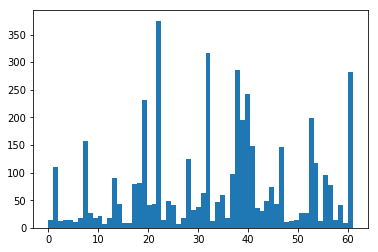

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

plt.hist(labels, 62);